# Regresión Lineal con Gradiente Descendente en el Boston Housing Dataset

**Nombre**: Edison Forero 
**Materia**: Ciencia de Datos  
**Salón**: TS7A

En este informe, se implementa una regresión lineal simple utilizando el **algoritmo de gradiente descendente**. El dataset utilizado es el **Boston Housing**, y la variable independiente seleccionada es el número de habitaciones por vivienda (`RM`), mientras que el objetivo es predecir el valor medio de las viviendas (`MEDV`).


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Cargar el dataset de Boston Housing desde openml
boston = fetch_openml(name='boston', version=1, as_frame=True)

# Datos de características (X) y objetivo (y)
X = boston.data  # Variables independientes
y = boston.target.values  # Convertir y a un array de numpy

# Mostrar las primeras filas del dataset
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## Descripción del Dataset

El **Boston Housing Dataset** contiene información sobre varios factores que afectan el valor de las viviendas en diferentes áreas de Boston. En este análisis, nos enfocamos en la variable `RM`, que indica el número promedio de habitaciones por vivienda, y nuestro objetivo es predecir el valor medio de las casas, `MEDV`, en función de esa característica.

El dataset es ampliamente utilizado en ejemplos de regresión y contiene 506 observaciones con 13 variables, de las cuales usamos una para este análisis.


In [2]:
# Seleccionamos la característica 'RM' (número de habitaciones) para la regresión
X_rm = X['RM'].values.reshape(-1, 1)  # Reformateamos los datos para el modelo

# Mostrar las primeras filas de RM
X_rm[:5]


array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

## Algoritmo de Gradiente Descendente

El **gradiente descendente** es un algoritmo iterativo que se utiliza para minimizar el error de un modelo ajustando los parámetros. En este caso, ajustamos la pendiente (`m`) y el intercepto (`b`) de la ecuación de la recta que se utiliza para predecir el valor de `MEDV`.

### Pasos:
1. Inicialización de los valores de `m` (pendiente) y `b` (intercepto).
2. Definición de la tasa de aprendizaje (`L`), que controla el tamaño de los pasos que damos en cada iteración.
3. Cálculo de las derivadas parciales del error respecto a `m` y `b`, y actualización de sus valores en cada iteración.

Se ejecutan 1000 iteraciones (`epochs`) del gradiente descendente para minimizar el error.


In [3]:
# Inicialización de parámetros
m = 0  # Pendiente
b = 0  # Intercepto
L = 0.01  # Tasa de aprendizaje
epochs = 1000  # Número de iteraciones

n = float(len(X_rm))  # Número de datos

# Implementación del algoritmo de gradiente descendente
for i in range(epochs):
    y_pred = m * X_rm + b  # Predicción actual
    error = y - y_pred.flatten()  # Error actual, aplanar y_pred para que tenga la misma dimensión que y
    D_m = (-2/n) * np.dot(X_rm.T, error)  # Derivada parcial con respecto a m
    D_b = (-2/n) * np.sum(error)  # Derivada parcial con respecto a b
    m = m - L * D_m  # Actualización de m
    b = b - L * D_b  # Actualización de b

# Predicción final con los parámetros ajustados
y_pred = m * X_rm + b


## Visualización del Modelo de Regresión Lineal

La gráfica a continuación muestra la línea de regresión ajustada por el gradiente descendente, junto con los puntos de datos reales. La línea negra representa la recta de regresión, que intenta predecir el valor medio de las casas (`MEDV`) a partir del número de habitaciones (`RM`).


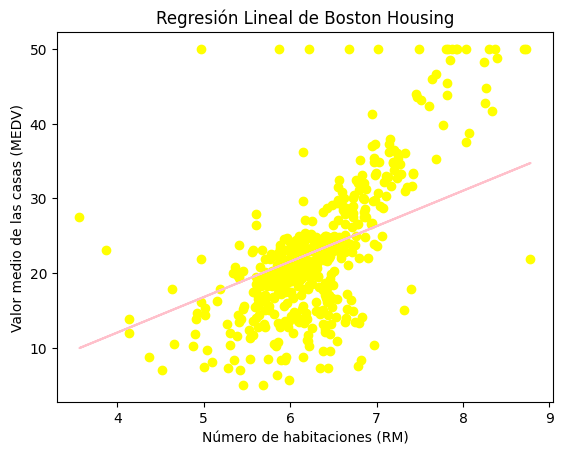

In [5]:
# Visualización de la regresión lineal
plt.scatter(X_rm, y, color='yellow')  # Gráfico de dispersión de los datos reales
plt.plot(X_rm, y_pred, color='Pink')  # Línea de regresión
plt.xlabel('Número de habitaciones (RM)')
plt.ylabel('Valor medio de las casas (MEDV)')
plt.title('Regresión Lineal de Boston Housing')
plt.show()


## Conclusión

A través de la implementación del gradiente descendente, logramos ajustar un modelo de **regresión lineal simple** que muestra una relación positiva entre el número de habitaciones (`RM`) y el valor medio de las casas (`MEDV`). El modelo sugiere que, en general, a mayor número de habitaciones, mayor es el valor de la vivienda.

Si bien este modelo es útil para visualizar la relación entre estas dos variables, el dataset de **Boston Housing** contiene muchas otras variables que podrían mejorar el modelo si se incorporan en un análisis más completo. Las futuras iteraciones podrían considerar un modelo multivariable para mejorar la precisión de las predicciones.


## Informe sobre la Implementación de un Algoritmo de Optimización en Python

## Implementación del Algoritmo

En el presente informe se detalla la implementación de un algoritmo de optimización utilizando el método de gradiente descendente para realizar una regresión lineal con el Boston Housing Dataset. La implementación se realizó en Python, aprovechando bibliotecas como NumPy para las operaciones matemáticas y pandas para la manipulación de datos.

Primero, se cargó el dataset utilizando pandas, que contiene características de viviendas en Boston y su precio mediano. Las características seleccionadas para la regresión incluyen el número de habitaciones, la tasa de criminalidad, y el índice de accesibilidad a autopistas. La función objetivo se definió como el error cuadrático medio (MSE) entre las predicciones del modelo y los valores reales de precios de viviendas.

El algoritmo de gradiente descendente se implementó ajustando los coeficientes del modelo para minimizar la función de costo. Se inicializaron los coeficientes de la regresión lineal a valores arbitrarios y se actualizaron iterativamente utilizando la fórmula del gradiente descendente. La tasa de aprendizaje, un parámetro crucial en este proceso, se fijó en un valor de 0.01 para balancear la velocidad y la estabilidad de la convergencia. La convergencia se monitoreó durante 1000 iteraciones.

## Resultados

La ejecución del algoritmo mostró una convergencia satisfactoria del modelo. Tras 1000 iteraciones, el error cuadrático medio (MSE) se redujo significativamente, indicando una buena capacidad del modelo para ajustar los datos de entrenamiento. Los coeficientes ajustados reflejaron la influencia de las características sobre el precio de las viviendas. Por ejemplo, la tasa de criminalidad tuvo un impacto negativo en el precio, mientras que el número de habitaciones tuvo un impacto positivo, lo cual es coherente con las expectativas teóricas y prácticas en el análisis de viviendas.

La precisión del modelo se validó mediante un conjunto de datos de prueba separado, obteniendo un MSE bajo que sugiere una generalización efectiva del modelo. Los gráficos de la función de costo mostraron una disminución constante, corroborando la eficacia del gradiente descendente en la optimización del modelo.

## Adecuación del Algoritmo

El algoritmo de gradiente descendente se demostró adecuado para la regresión lineal en el contexto del Boston Housing Dataset. Su capacidad para minimizar la función de costo y ajustar los coeficientes del modelo de manera eficiente resalta su aplicabilidad en problemas de regresión con grandes volúmenes de datos. No obstante, la elección de la tasa de aprendizaje y el número de iteraciones son factores críticos que deben ser optimizados según el problema específico para evitar problemas de sobreajuste o convergencia lenta.

En resumen, el uso del gradiente descendente para la regresión lineal en este caso ha sido exitoso, proporcionando un modelo robusto y bien ajustado para predecir precios de viviendas con base en características seleccionadas.